# Task: Analysis of Disengagement Descriptions
The goal of this notebook will be to explore 2019 autonomous vehicle disengagement reports and find trends and causes. The notebook features n-grams and aggrigation.

Thanks to:
* Art124 https://www.kaggle.com/art12400 for both the dataset and the task

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/2019-autonomous-vehicle-disengagement-reports/2019AutonomousVehicleDisengagementReports.csv
/kaggle/input/2019-autonomous-vehicle-disengagement-reports/2018-19_AutonomousVehicleDisengagementReports(firsttimefilers).csv


The two datasets are from December 1, 2018 to November 30, 2019. The first time filers dataset refers to those companies that recieved their autonomous vehichle permit during this cycle, the other dataset contains info from companies whose permit predates the timeframe.

In [2]:
reports = pd.read_csv('/kaggle/input/2019-autonomous-vehicle-disengagement-reports/2019AutonomousVehicleDisengagementReports.csv')
reports_ftf = pd.read_csv('/kaggle/input/2019-autonomous-vehicle-disengagement-reports/2018-19_AutonomousVehicleDisengagementReports(firsttimefilers).csv')

In [3]:
reports.iloc[322,-1]

'Error in perception system detection due to weather conditions'

In [4]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import re

In [5]:
# This creates one long string to perform n-gram operations on
super_string = reports['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'].astype(str).sum()
super_string = re.sub(r'[^\w\s]','',super_string)
super_string = super_string.split(' ')
stop_words = set(nltk.corpus.stopwords.words('english'))
super_string = [word for word in super_string if word not in stop_words]
len(super_string)

94315

# n-Grams
N-grams are a tool in nlp for finding sets of commonly co-occuring words, where n refers to the number of consecutive occuring words. for instance 'Machine', 'Learning', 'Rules' would be a 3 word n-gram or trigram. Notice how the tope seven bigrams overlap and have the same count, this is because there are multiple identical entries. When we view skip-grams (where words don't need to occur imediately next to one another) we start seeing more non-overlapping counts.

In [6]:
word_fd = nltk.FreqDist(super_string)
monogram_fd = nltk.FreqDist(nltk.ngrams(super_string,1))
monogram_fd.most_common(9)

[(('vehicles',), 3159),
 (('vehicle',), 3129),
 (('caused',), 2259),
 (('road',), 2226),
 (('trajectory',), 2104),
 (('conditions',), 2101),
 (('Vehicle',), 2046),
 (('present',), 2045),
 (('active',), 2040)]

In [7]:
bigram_fd = nltk.FreqDist(nltk.bigrams(super_string))
bigram_fd.most_common(10)

[(('vehicles', 'collisions'), 2040),
 (('collisions', 'present'), 2040),
 (('present', 'vicinity'), 2040),
 (('vicinity', 'Weather'), 2040),
 (('Weather', 'andor'), 2040),
 (('andor', 'road'), 2040),
 (('road', 'conditions'), 2040),
 (('Vehicle', 'active'), 2035),
 (('active', 'construction'), 2035),
 (('construction', 'zone'), 2035)]

In [8]:

bigram_fd = nltk.FreqDist(nltk.ngrams(super_string, 6))
bigram_fd.most_common(10)

[(('vehicles', 'collisions', 'present', 'vicinity', 'Weather', 'andor'), 2040),
 (('collisions', 'present', 'vicinity', 'Weather', 'andor', 'road'), 2040),
 (('present', 'vicinity', 'Weather', 'andor', 'road', 'conditions'), 2040),
 (('Vehicle', 'active', 'construction', 'zone', 'No', 'emergency'), 2035),
 (('active', 'construction', 'zone', 'No', 'emergency', 'vehicles'), 2035),
 (('construction', 'zone', 'No', 'emergency', 'vehicles', 'collisions'), 2035),
 (('zone', 'No', 'emergency', 'vehicles', 'collisions', 'present'), 2035),
 (('No', 'emergency', 'vehicles', 'collisions', 'present', 'vicinity'), 2035),
 (('emergency', 'vehicles', 'collisions', 'present', 'vicinity', 'Weather'),
  2035),
 (('vicinity', 'Weather', 'andor', 'road', 'conditions', 'dry'), 2018)]

In [9]:
skipgram_fd = nltk.FreqDist(nltk.skipgrams(super_string, n=4, k=3))

skipgram_fd.most_common(9)

[(('Driver', 'proactive', 'disengagementSafety', 'Driver'), 4346),
 (('proactive', 'disengagementSafety', 'Driver', 'proactive'), 4346),
 (('disengagementSafety', 'Driver', 'proactive', 'disengagementSafety'), 3628),
 (('due', 'operator', 'discomfortDisengage', 'due'), 2525),
 (('operator', 'discomfortDisengage', 'due', 'operator'), 2491),
 (('discomfortDisengage', 'due', 'operator', 'discomfortDisengage'), 2487),
 (('Vehicle', 'active', 'zone', 'vehicles'), 2040),
 (('active', 'zone', 'vehicles', 'collisions'), 2040),
 (('zone', 'vehicles', 'collisions', 'present'), 2040)]

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Value counts
For a simple approach, below we have the 15 descriptions for most common causes for disengagement, followed by a graph of the distrobution of the top 30. The most popular entry; 'Safety Driver proactive disengagement' has over 1700 incedents, more than twice the next highest entry and accounting for roughly 1 fifth of all entries.

In [11]:
list(pd.value_counts(reports['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT']).iloc[:15].index)

['Safety Driver proactive disengagement.',
 'Disengage for unwanted maneuver of the vehicle caused by a planning discrepancy while generating an appropriate trajectory',
 'Automatic disengagement caused by planner fault.',
 'Disengage due to operator discomfort',
 'Disengage for a software fault due to a potential performance issue with a software component of the self-driving system (including third party software components)',
 'System generation of vehicle trajectory took longer than expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.',
 'Driver pressed the brake pedal because the vehicle was driving faster than driver expected. Vehicle not in an active construction zone. No emergency vehicles or collisions present in the vicinity. Weather and/or road conditions dry in the area.',
 "Unwanted maneuver or stop by vehicle - the vehicle's trajectory planner produced a trajector

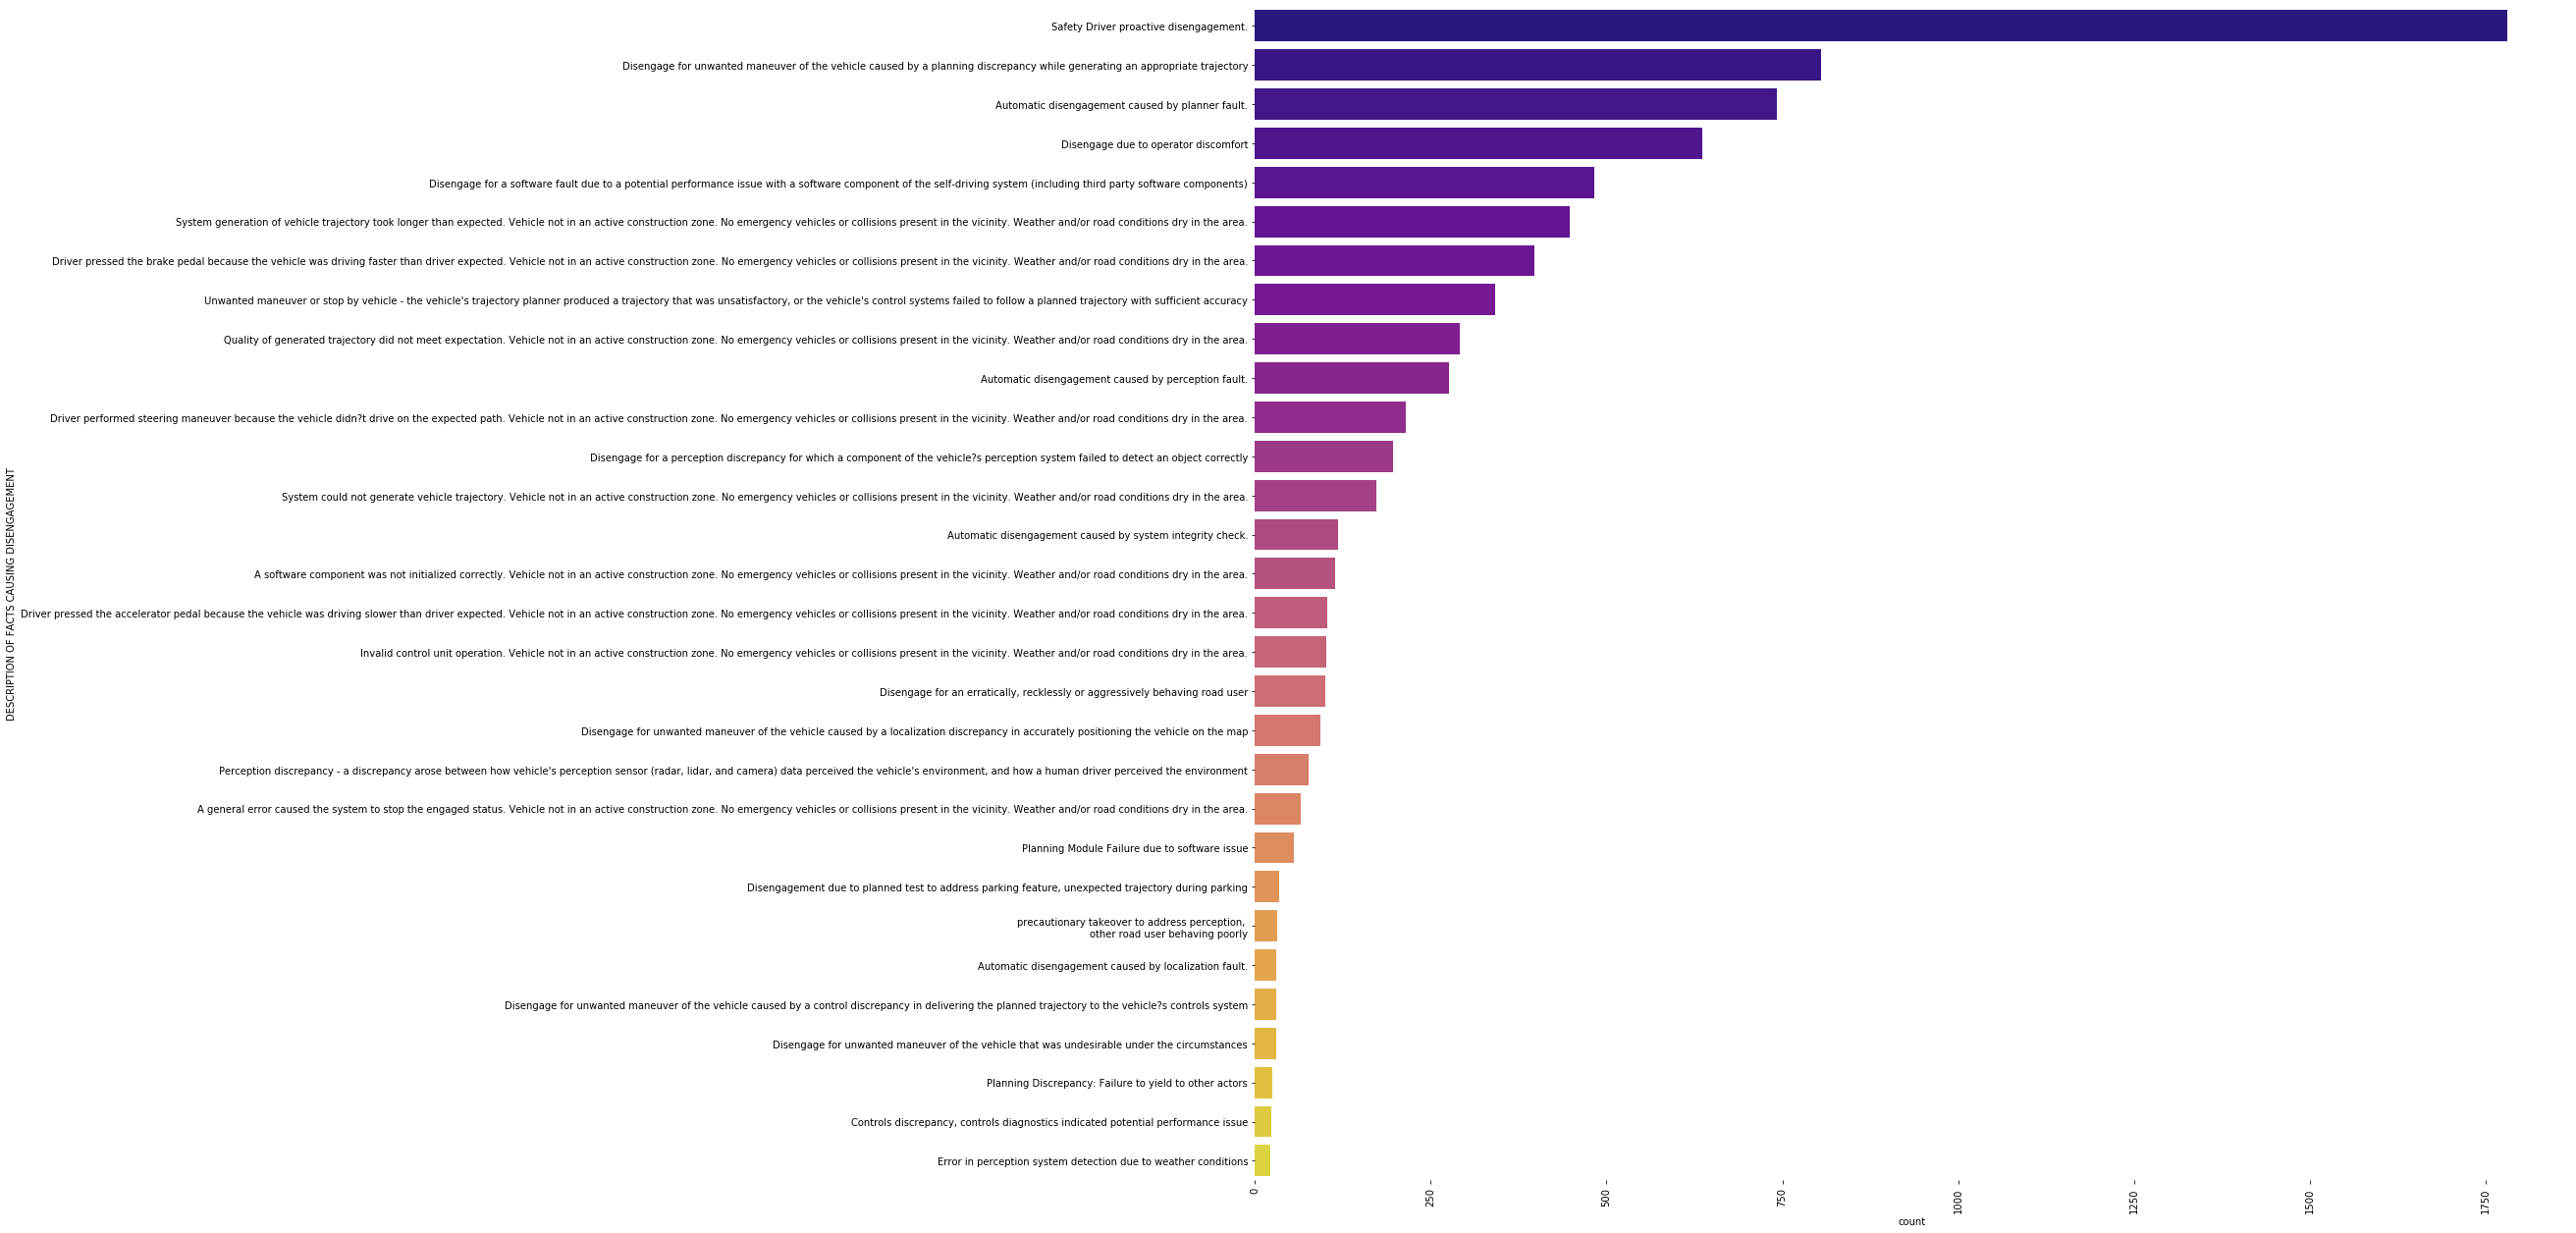

In [12]:
figure(num=None, figsize=(24, 22))
sns.countplot(y='DESCRIPTION OF FACTS CAUSING DISENGAGEMENT', palette='plasma',data=reports,order=pd.value_counts(reports['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT']).iloc[:30].index)
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90);

For our dataset on first time filers we have a very different set of answers. The most common issue is 'Software Discrepency' more than 4 times as common as the next highest entry, however this issue accounts for less than a tenth of the whole dataset.

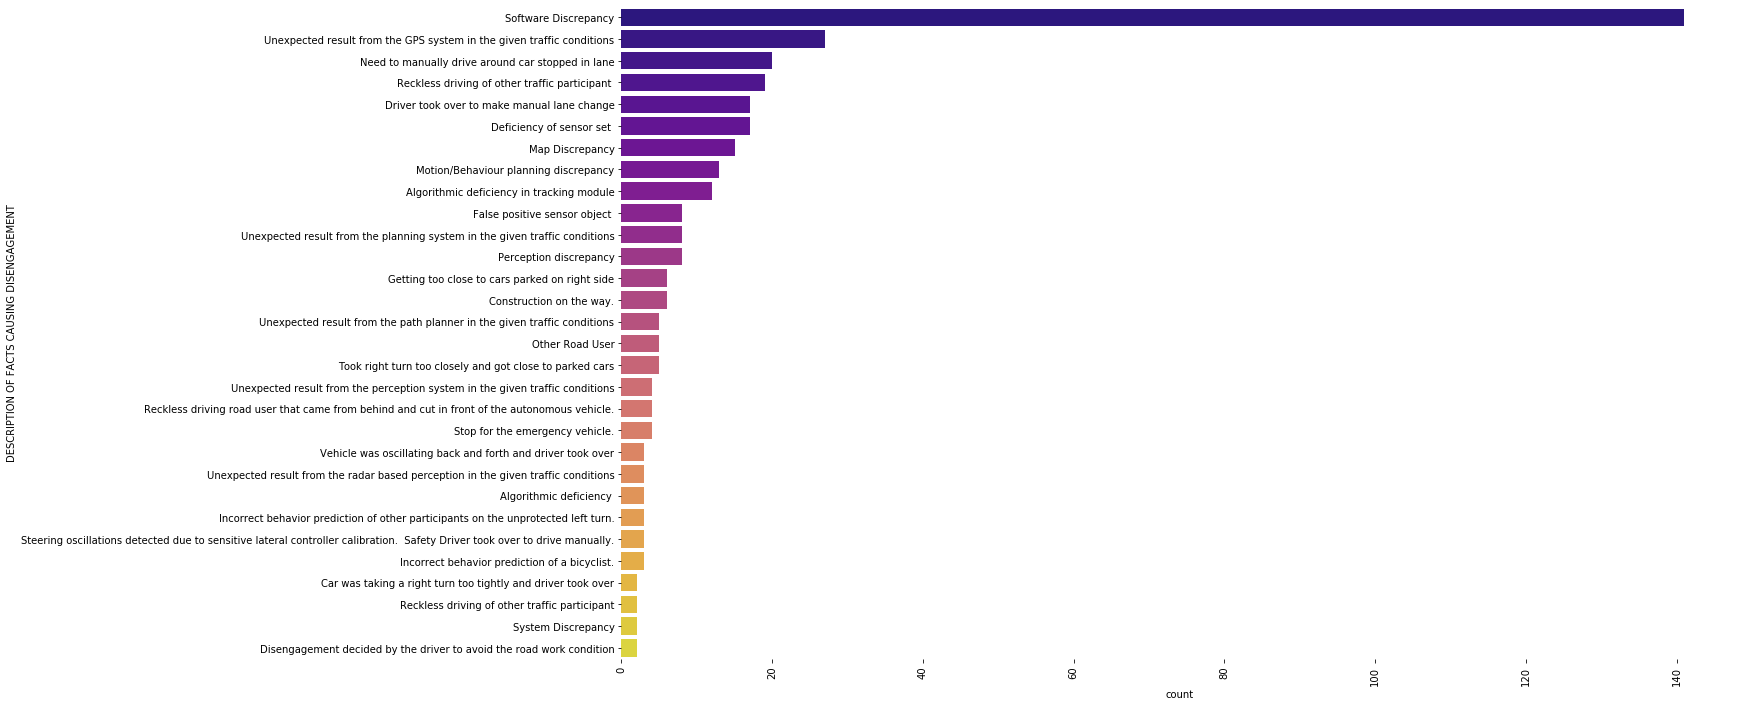

In [13]:
figure(num=None, figsize=(20, 12))
sns.countplot(y='DESCRIPTION OF FACTS CAUSING DISENGAGEMENT', palette='plasma',data=reports_ftf,order=pd.value_counts(reports_ftf['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT']).iloc[:30].index)
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90);

# Uniformity in reports
As we can see below, the leading disengagement descriptions are almost identical in every other column (with the obvious exception of date).

In [14]:
reports.loc[reports['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'] == 'Safety Driver proactive disengagement.'].describe()

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT
count,1780,1780,1780,1780,1780,1780,1780,1780,1780
unique,1,1,1780,6,1,1,1,2,1
top,Toyota Research Institute,AVT050,2019-01-15 16:44:16,JTHDU1EF3G5020098,No,Yes,Test Driver,street,Safety Driver proactive disengagement.
freq,1780,1780,1,572,1780,1780,1780,1779,1780


In [15]:
reports_ftf.loc[reports_ftf['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'] == 'Software Discrepancy'].describe()

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT,Unnamed: 9,Unnamed: 10
count,141,141,141,141,141,141,141,141,141,0,0
unique,1,1,22,3,1,1,1,1,1,0,0
top,Intel Corporation,AVT052,6/7/2018,3FA6P0LU4HR195512,Yes,Yes,Test Driver,Street,Software Discrepancy,NaN,NaN
freq,141,141,21,133,141,141,141,141,141,NaN,NaN



This year I've challenged myself to complete one task on Kaggle per week, in order to develop a larger Data Science portfolio. If you found this notebook useful or interesting please give it an upvote. I'm always open to constructive feedback. If you have any questions, comments, concerns, or if you would like to collaborate on a future task of the week feel free to leave a comment here or message me directly. For past TOTW check out the link to my page on github for this ongoing project https://github.com/Neil-Kloper/Weekly-Kaggle-Task/wiki